# Return Distribution

In all our analyses, we use estimations for either simple or logarithmic rates of return. Deepending on the data we use (for example when we work with crosssectional data we need to use simple rates of return).<br/>

The formula for simple returns is

$$
\frac{P_t - P_{t-1}}{P_{t-1}}
,$$

while the formula for log returns is

$$
ln( \frac{P_t}{P_{t-1}} )
.$$



Calculate the same formula for log returns with the help of the .pct_change(). 

Mathematically, it will look like this:

$$
ln(\frac{P_t}{P_{t-1}} ) = ln( \frac{P_t - P_{t-1}}{P_{t-1}} + \frac{P_{t-1}}{P_{t-1}}) = ln(\ simple.returns + 1) 
$$ = np.log($P_t$.pct_change() + 1).

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.pylabtools import figsize
figsize(12.5, 5)


import matplotlib.pyplot as plt
import warnings
plt.style.use('dark_background')
warnings.simplefilter(action='ignore', category=FutureWarning)


import pandas as pd
from pandas.tseries.offsets import BDay
import yfinance as yf
from yahoofinancials import YahooFinancials

import sys
sys.path.insert(0, '../../scripts/')

import numpy as np

import utilities as ut
from utilities import clean_ticker
from utilities import clean_tickers
from utilities import fill_na 

import scipy.stats as stats

p = print

from mpl_toolkits import mplot3d
import matplotlib.gridspec as gridspec
import plotnine as pn
import mizani.breaks as mzb
import mizani.formatters as mzf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn-ticks')
plt.rcParams['font.family'] = 'DejaVu Sans Mono'
plt.rcParams['font.size'] = 9.5
plt.rcParams['font.weight'] = 'medium'
plt.rcParams['figure.figsize'] = 10,7
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)
#=========================================================================
# Plot the Distribution of Return Data
#=========================================================================
def add_mean_std_text(x, **kwargs):
    """fn: add mean, std text to seaborn plot
    
    # Args
        x : pd.Series()
    """
    mean, std = x.mean(), x.std()
    mean_tx = f"mean: {mean:.4%}\nstd: {std:.4%}"
    
    txkw = dict(size=14, fontweight='demi', color='red', rotation=0)
    ymin, ymax = plt.gca().get_ylim()
    plt.text(mean+0.025, 0.8*ymax, mean_tx, **txkw)
    return

def plot_dist(rs, ex):
    """fn: to plot single distro with fitted histograms using FacetGrid
    
    # Args
        rs : pd.DataFrame(), return df
        ex : str(), security/column name
    """    
    plt.style.use('dark_background')
    plt.rcParams['font.size'] = 14
    g = (rs
         .pipe(sns.FacetGrid, 
               size=5,
               aspect=1.5)
         .map(sns.distplot, ex, kde=False, fit=stats.norm,
              fit_kws={'color':green, 'lw':2.5, 'label':'norm'})
         .map(sns.distplot, ex, kde=False, fit=stats.laplace,
              fit_kws={'linestyle':'--', 'color':gold, 'lw':2.5, 'label':'laplace'})
         .map(sns.distplot, ex, kde=False, fit=stats.johnsonsu,
              fit_kws={'linestyle':'-', 'color':red, 'lw':2.5, 'label':'jsu'})
         .map(add_mean_std_text, ex))
    g.add_legend()
    sns.despine(offset=1)
    plt.title(f'{ex} returns')
    return
    
def plot_facet_hist(rs, ex):
    """fn: to plot multiple fitted histograms using FacetGrid
    
    # Args
        rs : pd.DataFrame(), return df
        ex : str(), security/column name
    """
    plt.style.use('dark_background')
    
    plt.rcParams['font.size'] = 12
    df = rs.assign(year=lambda df: df.index.year)
    g = (sns.FacetGrid(df, col='year',col_wrap=2, size=4, aspect=1.2) # make sure to add legend
         .map(sns.distplot, ex, kde=False, fit=stats.norm,
              fit_kws={'color':green, 'lw':2.5, 'label':'norm'})
         .map(sns.distplot, ex, kde=False, fit=stats.laplace,
              fit_kws={'linestyle':'--', 'color':gold, 'lw':2.5, 'label':'laplace'})
         .map(sns.distplot, ex, kde=False, fit=stats.johnsonsu,
              fit_kws={'linestyle':'-', 'color':red, 'lw':2.5, 'label':'jsu'})
         .map(add_mean_std_text, ex))

    g.add_legend()
    g.fig.subplots_adjust(hspace=.20)
    sns.despine(offset=1)
    return

## Load The Data 

#### Stock 1 -  Take-Two Interactive Software (ttwo)

#### Stock 2 -  CD Projekt S.A. (7cdf)

#### Stock 3 -  GameStop Corp. (gme)

In [8]:
symbols = ['TTWO', '7CD.F', 'GME']
symbols =clean_tickers(symbols)
FILE = '../../data/stock_data/hdf/portfolio_one.h5'

get_px = lambda x: pd.read_hdf(FILE, mode='r', key=x)['Close']
stocks = pd.DataFrame({sym:get_px(sym) for sym in symbols})

In [41]:
stocks

,ttwo,7cdf,gme
Date,,,
2001-10-15,6.799580,NaN,NaN
2001-10-16,7.172890,NaN,NaN
2001-10-17,6.919573,NaN,NaN
2001-10-18,7.012900,NaN,NaN
2001-10-19,7.386210,NaN,NaN
...,...,...,...
2021-02-02,207.110001,63.759998,90.000000
2021-02-03,202.399994,64.620003,92.410004
2021-02-04,201.490005,64.599998,53.500000


so the return of the stocks closing price can be calculated with:

In [43]:
(stocks/stocks.shift(1))-1

,ttwo,7cdf,gme
Date,,,
2001-10-15,NaN,NaN,NaN
2001-10-16,0.054902,NaN,NaN
2001-10-17,-0.035316,NaN,NaN
2001-10-18,0.013487,NaN,NaN
2001-10-19,0.053232,NaN,NaN
...,...,...,...
2021-02-02,0.030706,-0.045795,-0.600000
2021-02-03,-0.022742,0.013488,0.026778
2021-02-04,-0.004496,-0.000310,-0.421058


and

In [42]:
stocks.pct_change()

,ttwo,7cdf,gme
Date,,,
2001-10-15,NaN,NaN,NaN
2001-10-16,0.054902,NaN,NaN
2001-10-17,-0.035316,NaN,NaN
2001-10-18,0.013487,NaN,NaN
2001-10-19,0.053232,NaN,NaN
...,...,...,...
2021-02-02,0.030706,-0.045795,-0.600000
2021-02-03,-0.022742,0.013488,0.026778
2021-02-04,-0.004496,-0.000310,-0.421058


a simple way of calculating the log returns is:

In [46]:
np.log(stocks.pct_change() + 1)

,ttwo,7cdf,gme
Date,,,
2001-10-15,NaN,NaN,NaN
2001-10-16,0.053448,NaN,NaN
2001-10-17,-0.035955,NaN,NaN
2001-10-18,0.013397,NaN,NaN
2001-10-19,0.051864,NaN,NaN
...,...,...,...
2021-02-02,0.030244,-0.046876,-0.916291
2021-02-03,-0.023004,0.013398,0.026426
2021-02-04,-0.004506,-0.000310,-0.546554


#### Definition of Simple and Log Returns in Python

In [1]:
def to_return(prices,ret='simple'):
    if ret == 'simple':
        ret = (prices/prices.shift(1))-1
    else:
        ret = np.log(prices/prices.shift(1))
    return ret

This will be saved in scripts/ utilities.py 

#### Simple Return

In [10]:
ret = to_return(stocks, ret="simple")

In [11]:
ret

,ttwo,7cdf,gme
Date,,,
2001-10-15,NaN,NaN,NaN
2001-10-16,0.054902,NaN,NaN
2001-10-17,-0.035316,NaN,NaN
2001-10-18,0.013487,NaN,NaN
2001-10-19,0.053232,NaN,NaN
...,...,...,...
2021-02-02,0.030706,-0.045795,-0.600000
2021-02-03,-0.022742,0.013488,0.026778
2021-02-04,-0.004496,-0.000310,-0.421058


#### Log Return

In [30]:
log_ret = to_return(stocks, ret="log")

In [31]:
log_ret

,ttwo,7cdf,gme
Date,,,
2001-10-15,NaN,NaN,NaN
2001-10-16,0.053448,NaN,NaN
2001-10-17,-0.035955,NaN,NaN
2001-10-18,0.013397,NaN,NaN
2001-10-19,0.051864,NaN,NaN
...,...,...,...
2021-02-02,0.030244,-0.046876,-0.916291
2021-02-03,-0.023004,0.013398,0.026426
2021-02-04,-0.004506,-0.000310,-0.546554


#### NaN Values

we can drop or fill the NaN values in our pandas dataframe

In [14]:
ret.dropna()

,ttwo,7cdf,gme
Date,,,
2018-06-19,-0.023697,-0.073229,0.036184
2018-06-20,0.001528,-0.005052,-0.002540
2018-06-21,-0.012796,0.002604,-0.011458
2018-06-22,0.003948,-0.029607,-0.000644
2018-06-25,-0.001966,0.046969,-0.026418
...,...,...,...
2021-02-02,0.030706,-0.045795,-0.600000
2021-02-03,-0.022742,0.013488,0.026778
2021-02-04,-0.004496,-0.000310,-0.421058


All NaNs are droped from our dataframe. That leads to a cut in our data to 2018-06-19.

An alternative approche is to fill the missing values or NaNs with the mean of the data.

In [17]:
fill_na(ret)

,ttwo,7cdf,gme
Date,,,
2001-10-15,0.001152,0.001058,0.001345
2001-10-16,0.054902,0.001058,0.001345
2001-10-17,-0.035316,0.001058,0.001345
2001-10-18,0.013487,0.001058,0.001345
2001-10-19,0.053232,0.001058,0.001345
...,...,...,...
2021-02-02,0.030706,-0.045795,-0.600000
2021-02-03,-0.022742,0.013488,0.026778
2021-02-04,-0.004496,-0.000310,-0.421058


In [32]:
ret = fill_na(ret)
log_ret = log_ret.dropna()

## The Distribution of Return Data

We take the log returns and we start in 2015.

In [33]:
log_ret = log_ret['2015':]

In [35]:
log_ret

,ttwo,7cdf,gme
Date,,,
2018-06-19,-0.023982,-0.076049,0.035545
2018-06-20,0.001526,-0.005065,-0.002543
2018-06-21,-0.012878,0.002601,-0.011524
2018-06-22,0.003941,-0.030054,-0.000644
2018-06-25,-0.001968,0.045899,-0.026773
...,...,...,...
2021-02-02,0.030244,-0.046876,-0.916291
2021-02-03,-0.023004,0.013398,0.026426
2021-02-04,-0.004506,-0.000310,-0.546554


## Plot the Distribution

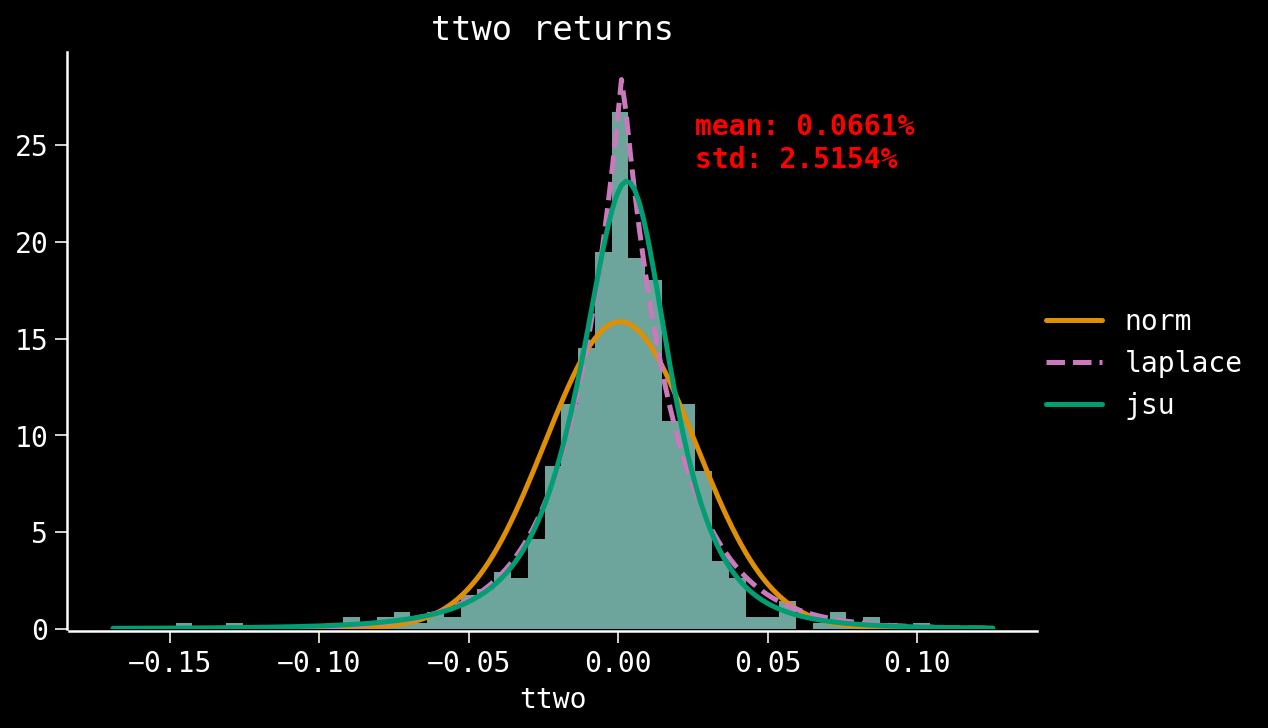

In [36]:
plot_dist(log_ret, "ttwo")

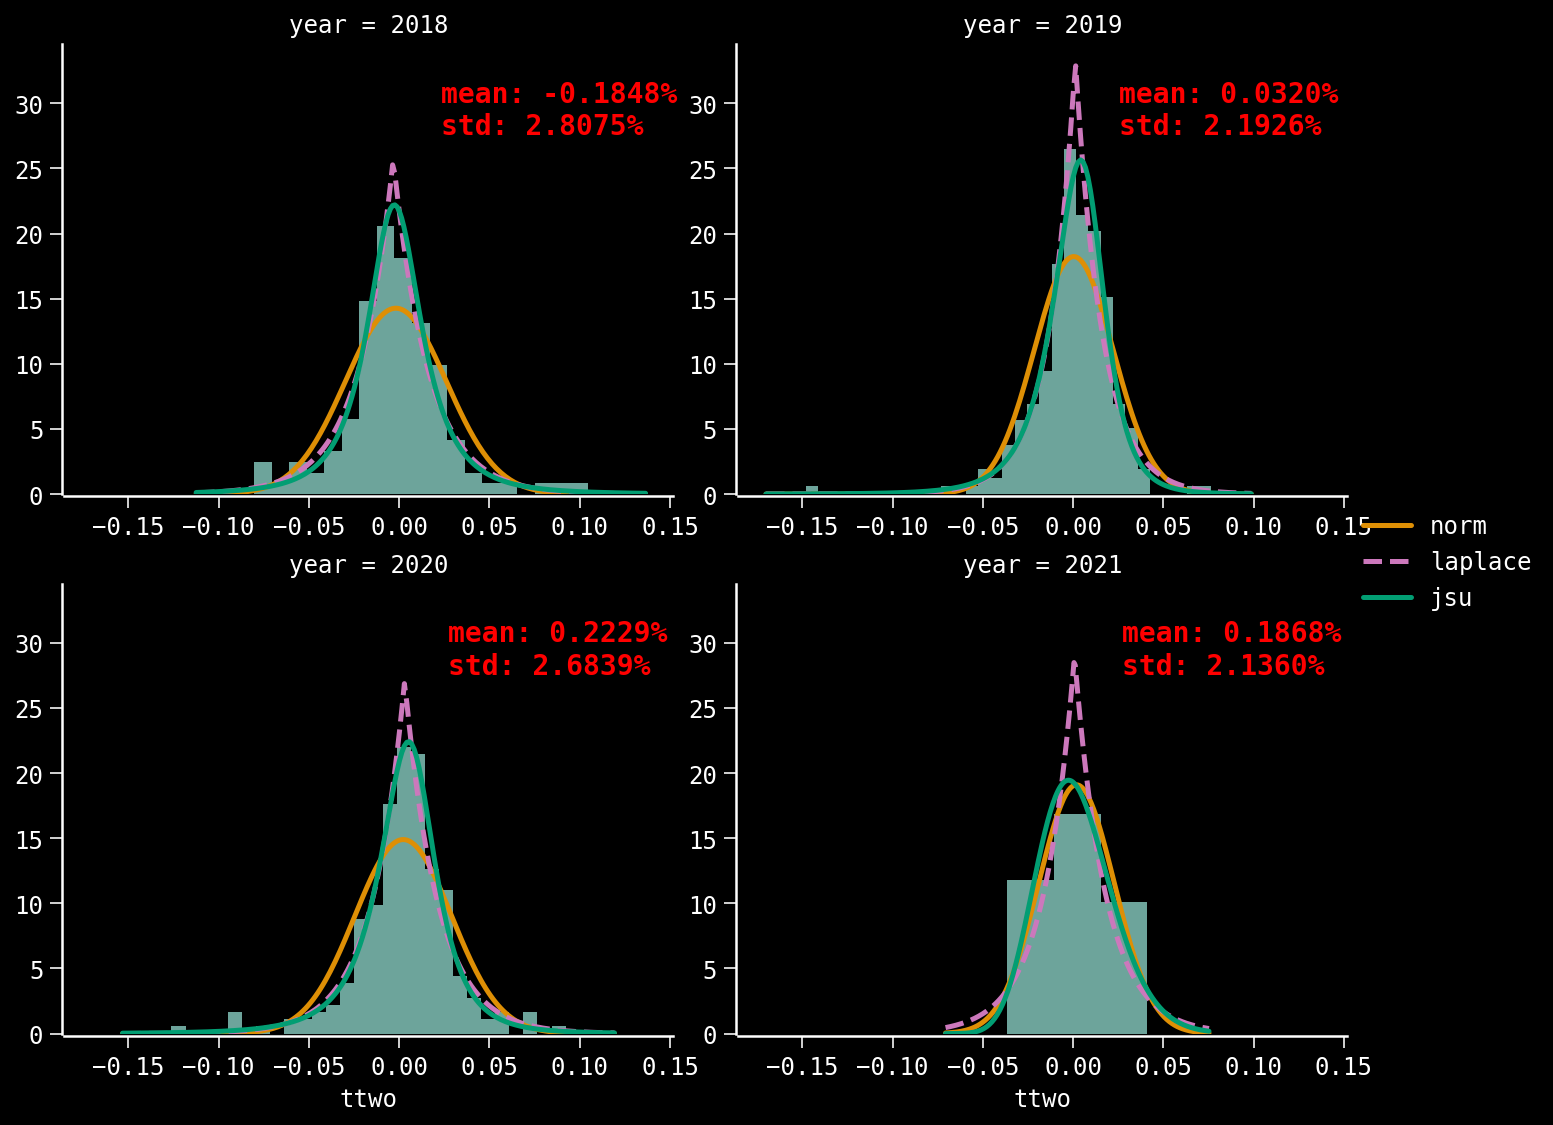

In [37]:
plot_facet_hist(log_ret, "ttwo")

#### Loop for plotting the distribution

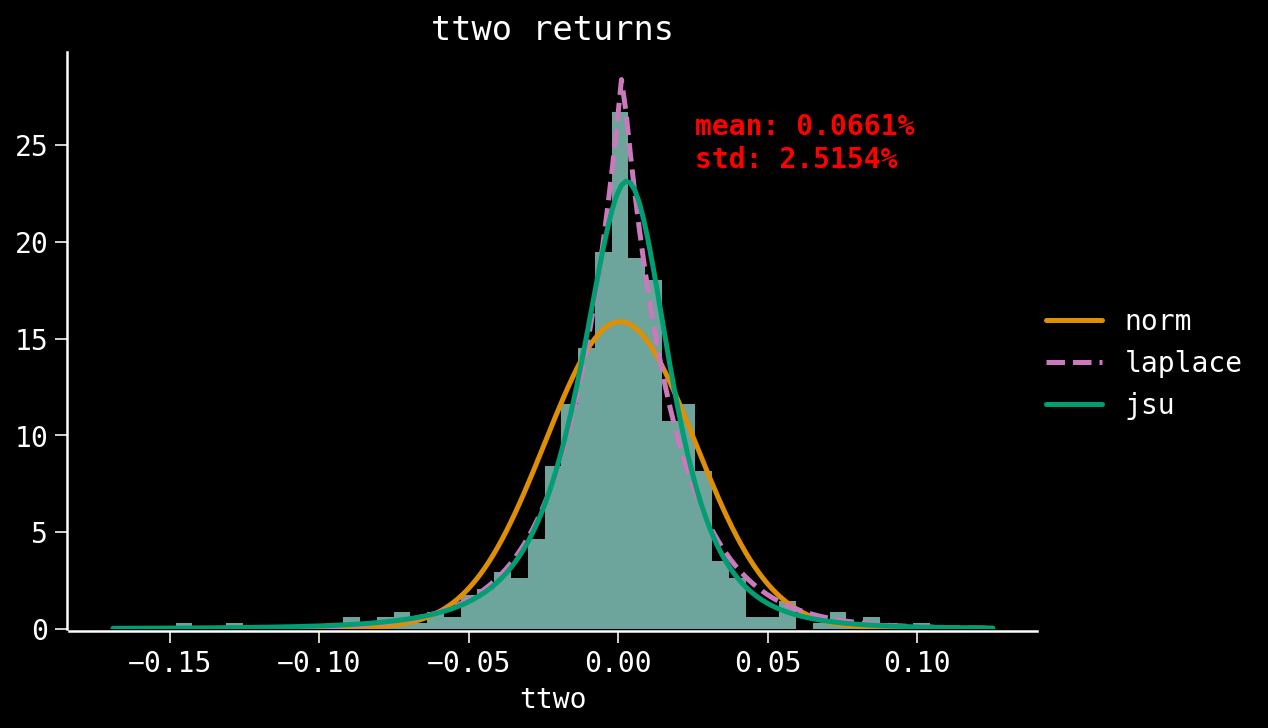

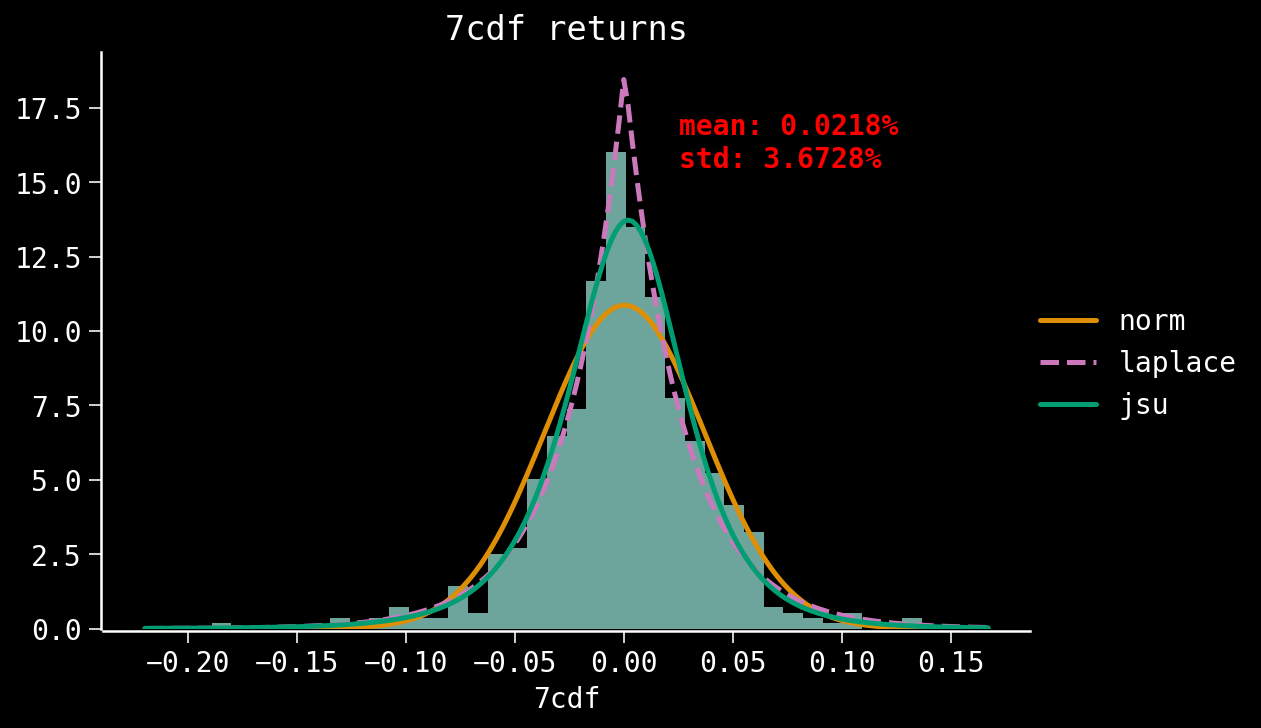

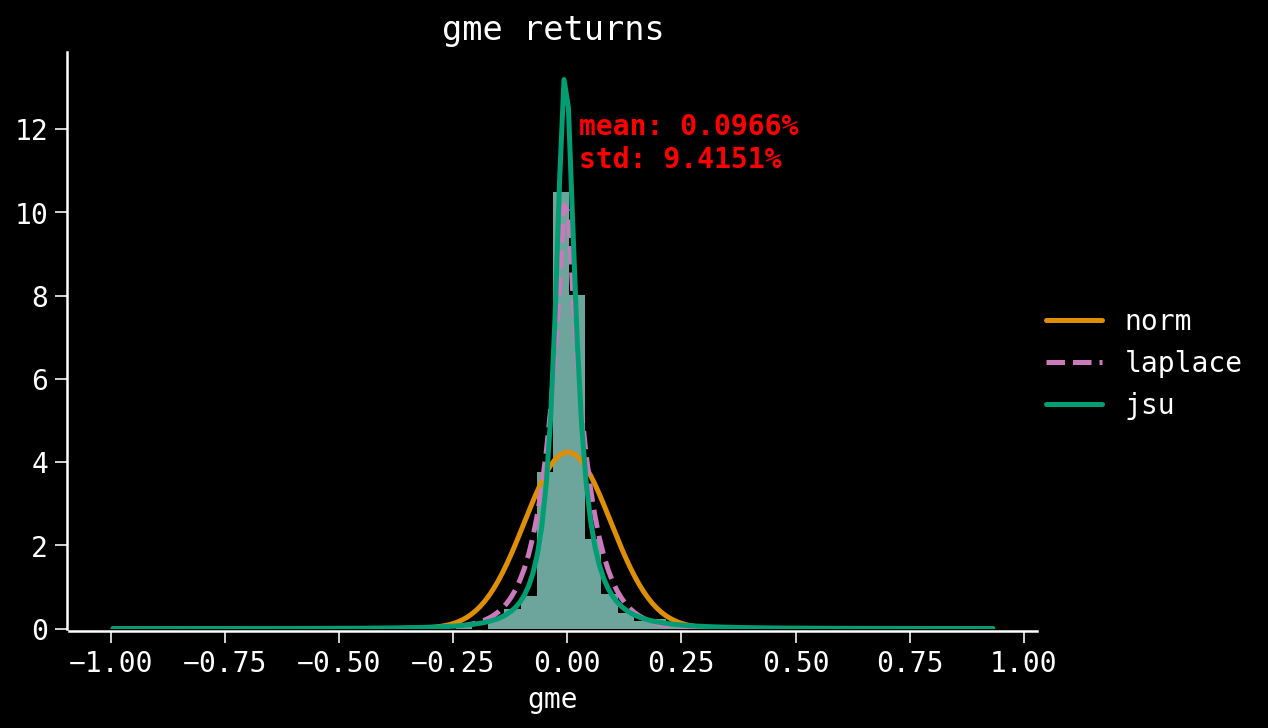

In [38]:
for stk in log_ret:
    plot_dist(log_ret, stk)

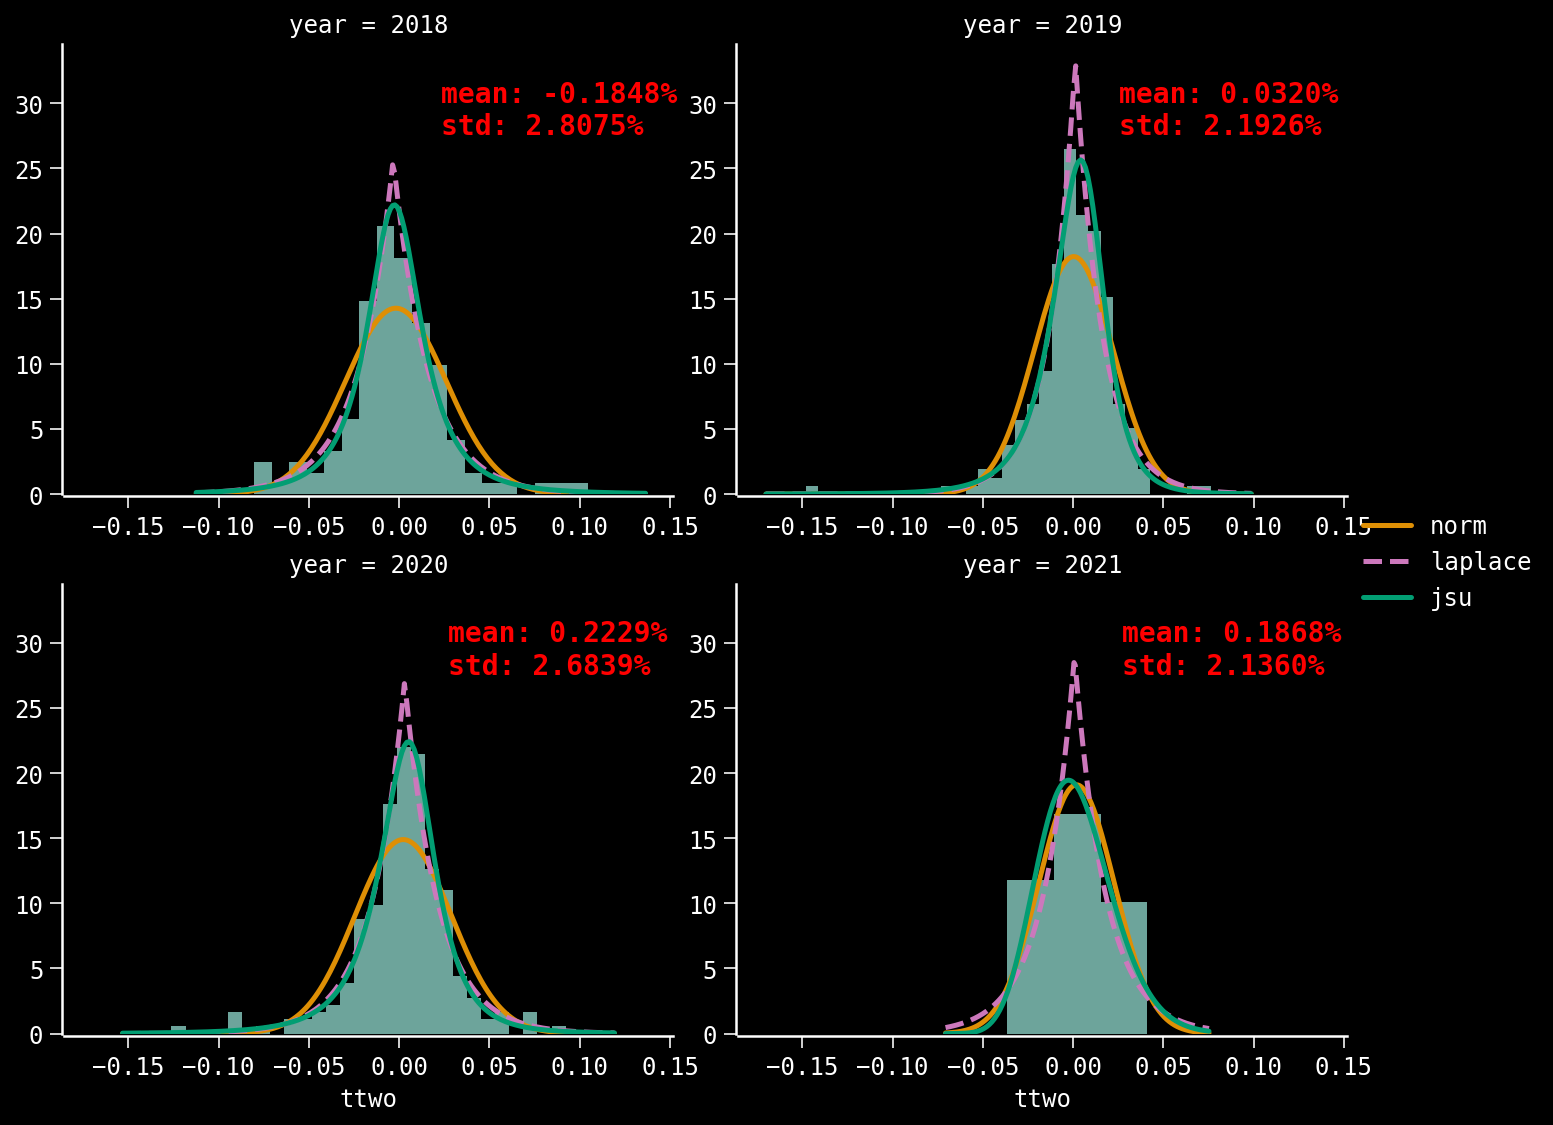

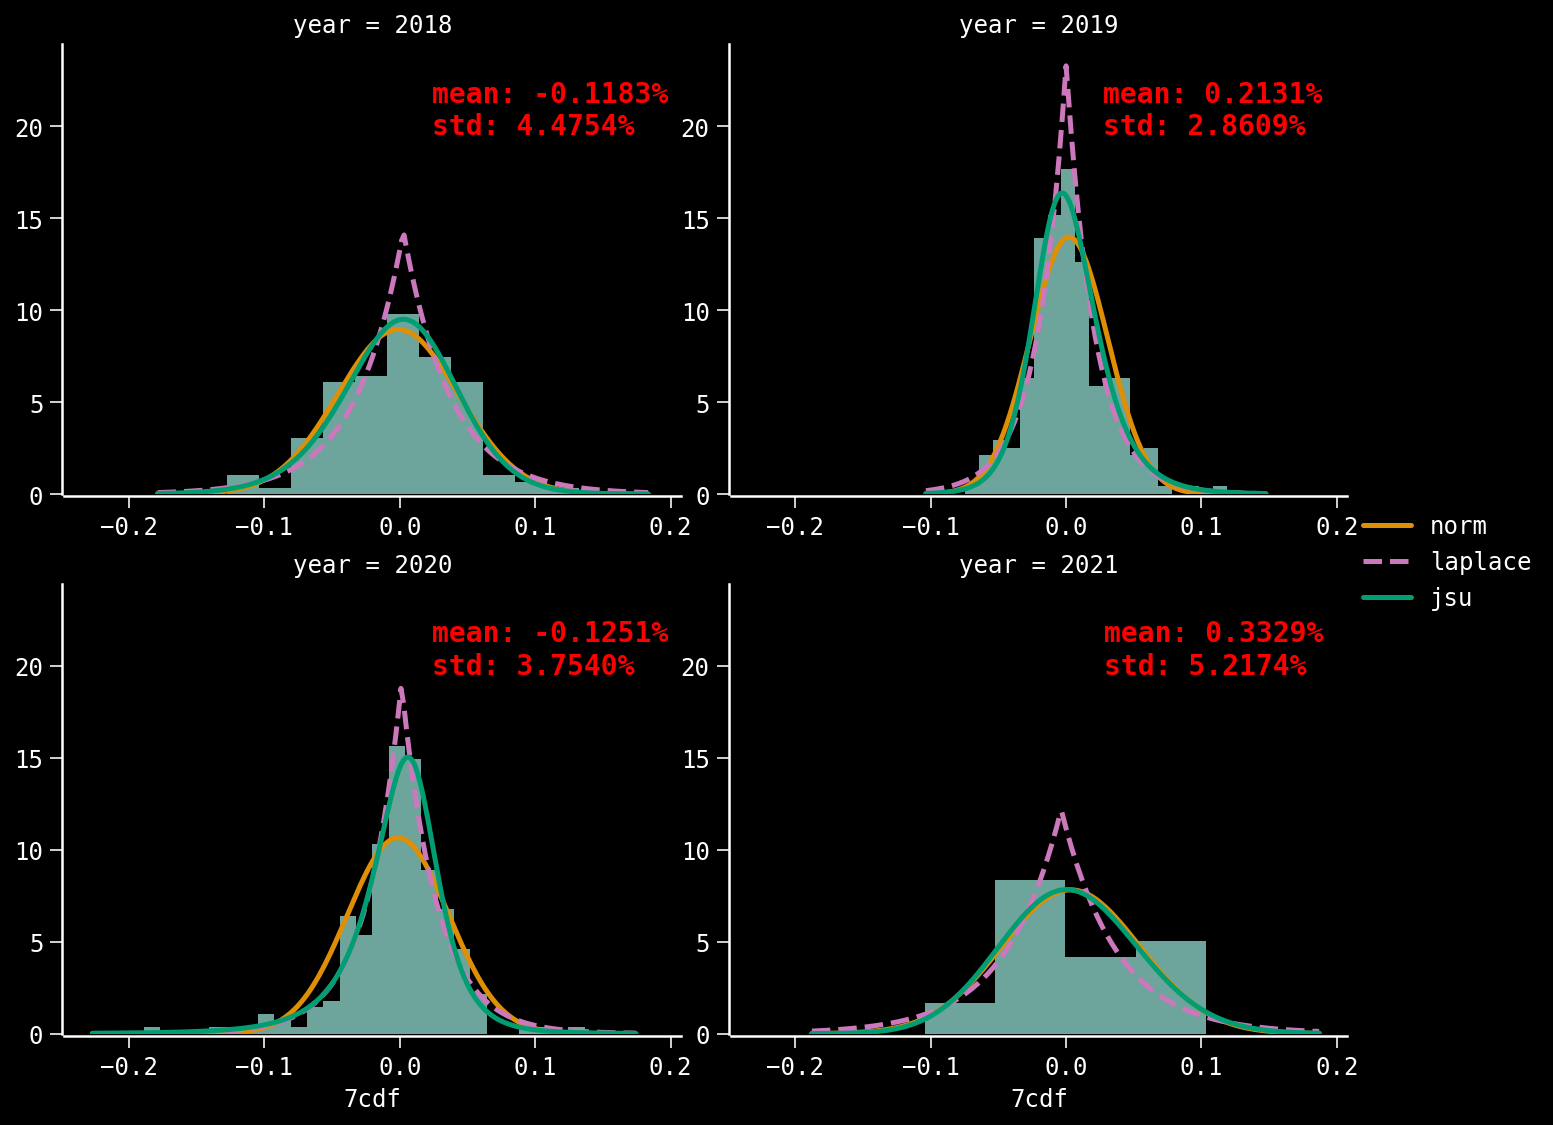

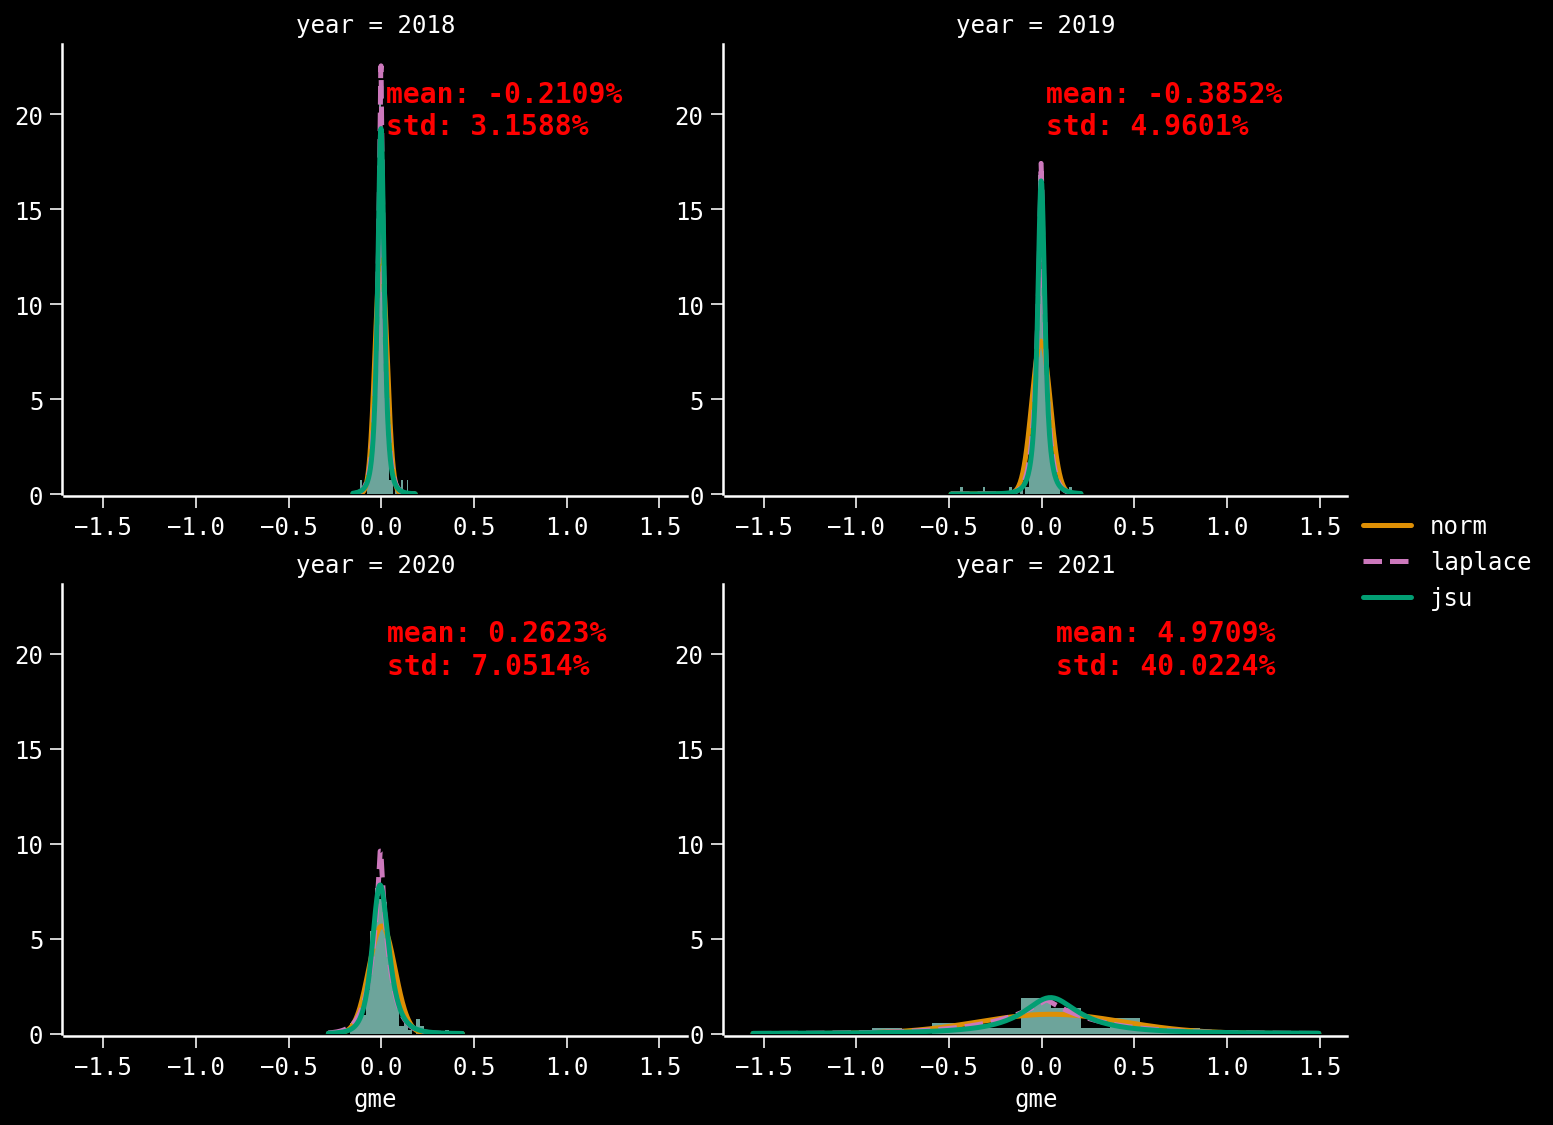

In [40]:
for stk in log_ret:
    plot_facet_hist(log_ret, stk)